In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

In [2]:
!pip install kaggle

In [3]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [4]:
! kaggle datasets download kushagra3204/wheat-plant-diseases

Dataset URL: https://www.kaggle.com/datasets/kushagra3204/wheat-plant-diseases
License(s): CC0-1.0
100% 6.09G/6.09G [01:06<00:00, 144MB/s]
100% 6.09G/6.09G [01:06<00:00, 99.1MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile("/content/wheat-plant-diseases.zip", "r")
zip_ref.extractall()
zip_ref.close()

**Data Exploration**

In [6]:
for dirpath, dirnames, filenames in os.walk("/content/data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 3 directories and 0 images in /content/data
There are 15 directories and 0 images in /content/data/test
There are 0 directories and 50 images in /content/data/test/blast_test
There are 0 directories and 50 images in /content/data/test/common_root_rot_test
There are 0 directories and 50 images in /content/data/test/leaf_blight_test
There are 0 directories and 50 images in /content/data/test/smut_test
There are 0 directories and 50 images in /content/data/test/stem_fly_test
There are 0 directories and 50 images in /content/data/test/mite_test
There are 0 directories and 50 images in /content/data/test/tan_spot_test
There are 0 directories and 50 images in /content/data/test/aphid_test
There are 0 directories and 50 images in /content/data/test/brown_rust_test
There are 0 directories and 50 images in /content/data/test/septoria_test
There are 0 directories and 50 images in /content/data/test/black_rust_test
There are 0 directories and 50 images in /content/data/test/fusarium_hea

In [7]:
def plot_random_image(image_path, image_class):
    folder = os.path.join(image_path, image_class)
    image_files = [f for f in os.listdir(folder) if f.endswith(".png")]
    random_image = random.choice(image_files)

    img = Image.open(os.path.join(folder, random_image))

    plt.imshow(img)
    plt.title(image_class)
    plt.axis("off")
    print(f"Image shape: {img.size}")
    plt.show()
    return img

Image shape: (259, 194)


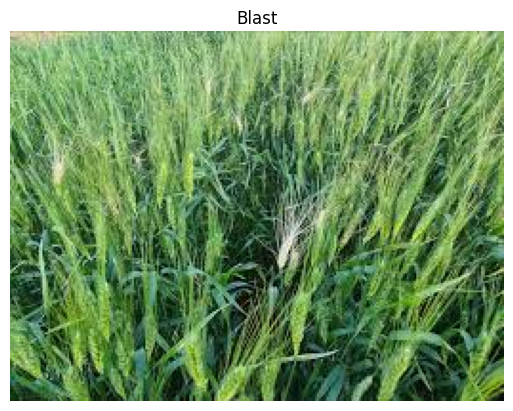

In [8]:
img= plot_random_image(image_path="/content/data/train/", image_class="Blast")

In [9]:
classes=os.listdir("/content/data/train")

In [10]:
classes

['Leaf Blight',
 'Black Rust',
 'Mite',
 'Smut',
 'Healthy',
 'Fusarium Head Blight',
 'Blast',
 'Stem fly',
 'Yellow Rust',
 'Mildew',
 'Aphid',
 'Tan spot',
 'Septoria',
 'Brown Rust',
 'Common Root Rot']

Image shape: (194, 259)


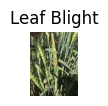

Image shape: (750, 2062)


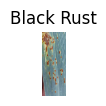

Image shape: (302, 167)


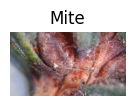

Image shape: (1474, 2208)


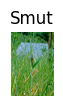

Image shape: (1324, 534)


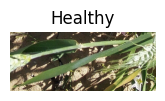

Image shape: (256, 256)


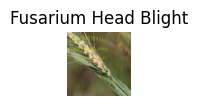

Image shape: (312, 162)


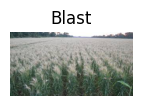

Image shape: (300, 200)


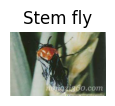

Image shape: (256, 256)


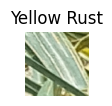

Image shape: (256, 256)


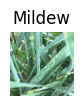

Image shape: (276, 182)


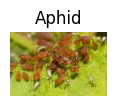

Image shape: (382, 132)


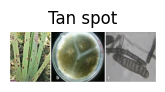

Image shape: (709, 1065)


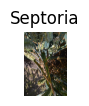

Image shape: (304, 184)


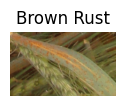

Image shape: (352, 143)


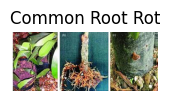

In [11]:
for i in range (len(classes)):
  plt.figure()
  plt.subplot(5, 3, i+1)
  images = plot_random_image("/content/data/train/", classes[i])

In [8]:
train_dir="/content/data/train"
test_dir="/content/data/test"
valid_dir="/content/data/valid"
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen=ImageDataGenerator(rescale=1/255.)
def preprocess_data(datagen, dir, batchsize, class_mod, tar_size):
  data=datagen.flow_from_directory(directory=dir, target_size=tar_size,class_mode=class_mod, batch_size=batchsize)
  return data

In [9]:
train_data=preprocess_data(train_datagen, batchsize=32,class_mod='categorical',tar_size=(255,255),dir=train_dir)

Found 13104 images belonging to 15 classes.


In [10]:
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [11]:
images[:2], images[0].shape

(array([[[[0.25490198, 0.37254903, 0.1764706 ],
          [0.19215688, 0.30980393, 0.10588236],
          [0.19215688, 0.30980393, 0.09803922],
          ...,
          [0.40000004, 0.54901963, 0.31764707],
          [0.44705886, 0.59607846, 0.35686275],
          [0.5019608 , 0.6509804 , 0.41176474]],
 
         [[0.24705884, 0.36078432, 0.17254902],
          [0.19607845, 0.32156864, 0.1254902 ],
          [0.20784315, 0.3254902 , 0.12156864],
          ...,
          [0.22352943, 0.3803922 , 0.13333334],
          [0.2509804 , 0.4039216 , 0.14901961],
          [0.2784314 , 0.43921572, 0.18039216]],
 
         [[0.24705884, 0.36078432, 0.17254902],
          [0.19607845, 0.32156864, 0.1254902 ],
          [0.20784315, 0.3254902 , 0.12156864],
          ...,
          [0.22352943, 0.3803922 , 0.13333334],
          [0.2509804 , 0.4039216 , 0.14901961],
          [0.2784314 , 0.43921572, 0.18039216]],
 
         ...,
 
         [[0.74509805, 0.86274517, 0.6666667 ],
          [0.63529

In [12]:
valid_data=preprocess_data(datagen=valid_datagen, tar_size=(255,255), batchsize=32, class_mod="categorical", dir=valid_dir)

Found 300 images belonging to 15 classes.


In [13]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=3)

In [26]:
checkpoint_filepath = "/content/Saved epochs"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True)

**Create Model 1**

In [19]:
model_1= tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(255,255,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(15,activation='softmax')
])

In [20]:
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
history_1=model_1.fit(train_data, validation_data=valid_data, epochs=100, callbacks=[model_checkpoint_callback, earlystop_callback])

Epoch 1/100
410/410 [==============================] - 235s 573ms/step - loss: 0.3080 - accuracy: 0.9206 - val_loss: 0.6525 - val_accuracy: 0.8867
Epoch 2/100
410/410 [==============================] - 235s 572ms/step - loss: 0.2048 - accuracy: 0.9470 - val_loss: 0.6319 - val_accuracy: 0.8967
Epoch 3/100
410/410 [==============================] - 231s 562ms/step - loss: 0.1741 - accuracy: 0.9565 - val_loss: 0.6566 - val_accuracy: 0.9167
Epoch 4/100
410/410 [==============================] - 229s 558ms/step - loss: 0.1503 - accuracy: 0.9603 - val_loss: 0.7900 - val_accuracy: 0.9100
Epoch 5/100
410/410 [==============================] - 240s 586ms/step - loss: 0.1272 - accuracy: 0.9620 - val_loss: 0.7289 - val_accuracy: 0.9167


**Model evaluation on validation set**

In [28]:
model_1.evaluate(valid_data)

10/10 [==============================] - 2s 234ms/step - loss: 0.7289 - accuracy: 0.9167


[0.7288816571235657, 0.9166666865348816]

In [14]:
test_data=preprocess_data(datagen=test_datagen, tar_size=(255,255), batchsize=32, class_mod="categorical", dir=test_dir)

Found 750 images belonging to 15 classes.


In [31]:
model_1.evaluate(test_data)

24/24 [==============================] - 8s 329ms/step - loss: 0.9218 - accuracy: 0.9027


[0.9217822551727295, 0.9026666879653931]

**Save Model**



In [44]:
model_1.save("wheat disease detection model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
loaded_model=load_model("/content/wheat disease detection model.h5")

In [46]:
loaded_model.evaluate(test_data)

24/24 [==============================] - 6s 244ms/step - loss: 0.9218 - accuracy: 0.9027


[0.9217821359634399, 0.9026666879653931]

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

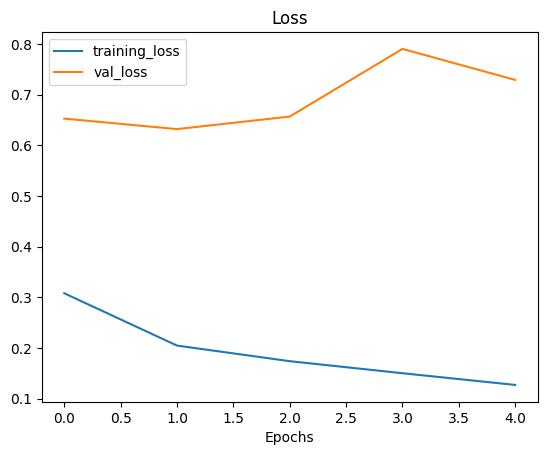

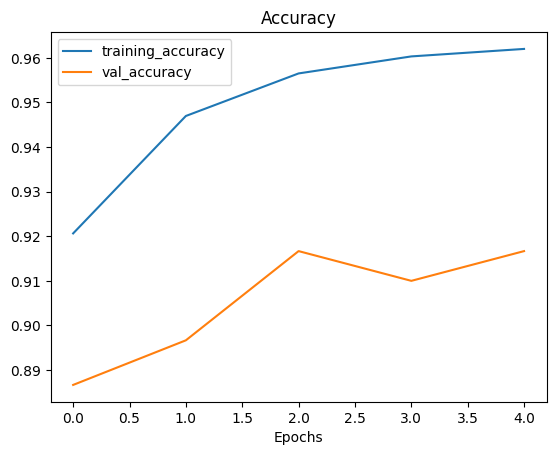

In [48]:
plot_loss_curves(history_1)

**There is an overfitting let's try to solve this problem using transfer learning**

In [18]:
checkpoint_filepath_VGG = "/content/Saved epochs_VGG"
model_checkpoint_callback_VGG = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_weights_only=True,
    save_best_only=True)

Using VGG architecture

In [25]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(255,255,3))

for layer in vgg19.layers:
    layer.trainable = False

model_2 = tf.keras.Sequential()
model_2.add(vgg19)
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(15,activation='softmax'))
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 15)                376335    
                                                                 
Total params: 20400719 (77.82 MB)
Trainable params: 376335 (1.44 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [26]:
model_2.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [29]:
history_2=model_2.fit_generator(generator=train_data, validation_data=valid_data, epochs=100, callbacks=[model_checkpoint_callback_VGG, earlystop_callback])

<ipython-input-29-bf8fcfe2ec3e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_2=model_2.fit_generator(generator=train_data, validation_data=valid_data, epochs=100, callbacks=[model_checkpoint_callback_VGG, earlystop_callback])


Epoch 1/100
410/410 [==============================] - 250s 610ms/step - loss: 0.8147 - accuracy: 0.7560 - val_loss: 0.9874 - val_accuracy: 0.7533
Epoch 2/100
410/410 [==============================] - 229s 558ms/step - loss: 0.4890 - accuracy: 0.8516 - val_loss: 0.5166 - val_accuracy: 0.8667
Epoch 3/100
410/410 [==============================] - 220s 537ms/step - loss: 0.3692 - accuracy: 0.8884 - val_loss: 0.7733 - val_accuracy: 0.8767
Epoch 4/100
410/410 [==============================] - 225s 549ms/step - loss: 0.3239 - accuracy: 0.9060 - val_loss: 0.8363 - val_accuracy: 0.8267
Epoch 5/100
410/410 [==============================] - 229s 559ms/step - loss: 0.2783 - accuracy: 0.9195 - val_loss: 0.8687 - val_accuracy: 0.9167


In [31]:
model_2.evaluate(test_data)

24/24 [==============================] - 14s 592ms/step - loss: 0.9482 - accuracy: 0.9040


[0.9482123851776123, 0.9039999842643738]

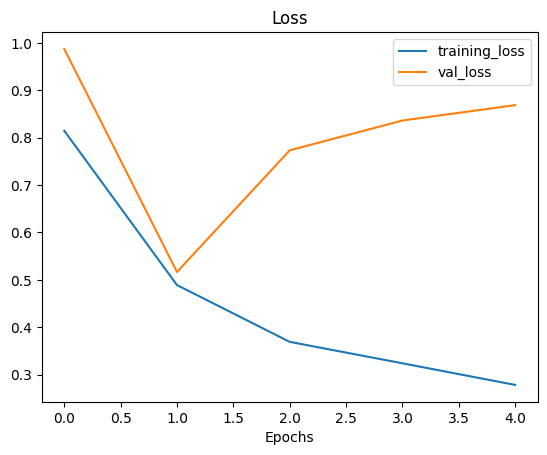

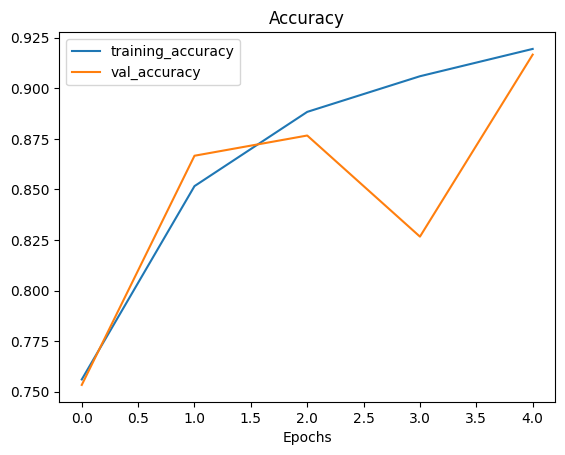

In [32]:
plot_loss_curves(history_2)

In [35]:
model_2.save("wheat_disease_detection_vgg.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Try VGG19 finetuning**

In [14]:
VGG_finetune= VGG19(weights='imagenet',include_top=False,input_shape=(255,255,3))

80134624/80134624 [==============================] - 2s 0us/step


In [15]:
VGG_finetune.layers

In [21]:
for layer_number, layer in enumerate(VGG_finetune.layers):
  print(f"Layer number: {layer_number} | Layer name: {layer.name} | Layer type: {layer} | Trainable? {layer.trainable}")

Layer number: 0 | Layer name: input_1 | Layer type: <keras.src.engine.input_layer.InputLayer object at 0x7848b08bf220> | Trainable? False
Layer number: 1 | Layer name: block1_conv1 | Layer type: <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7848abc6cee0> | Trainable? False
Layer number: 2 | Layer name: block1_conv2 | Layer type: <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7848abc6d660> | Trainable? False
Layer number: 3 | Layer name: block1_pool | Layer type: <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7848abc6e4d0> | Trainable? False
Layer number: 4 | Layer name: block2_conv1 | Layer type: <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7848abc6ebf0> | Trainable? False
Layer number: 5 | Layer name: block2_conv2 | Layer type: <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7848abc6f340> | Trainable? False
Layer number: 6 | Layer name: block2_pool | Layer type: <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object 

In [20]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(VGG_finetune.layers):
  print(layer_number, layer.name, layer.trainable)


0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_conv4 False
11 block3_pool False
12 block4_conv1 False
13 block4_conv2 False
14 block4_conv3 False
15 block4_conv4 False
16 block4_pool False
17 block5_conv1 False
18 block5_conv2 False
19 block5_conv3 False
20 block5_conv4 False
21 block5_pool False


In [19]:
VGG_finetune.trainable=False

In [25]:
VGG_finetune.trainable = True

# Freeze all layers except for the last 10
for layer in VGG_finetune.layers[:-5]:
  layer.trainable = False

# Recompile the whole model (always recompile after any adjustments to a model)
VGG_finetune.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [26]:
for layer_number, layer in enumerate(VGG_finetune.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_conv4 False
11 block3_pool False
12 block4_conv1 False
13 block4_conv2 False
14 block4_conv3 False
15 block4_conv4 False
16 block4_pool False
17 block5_conv1 True
18 block5_conv2 True
19 block5_conv3 True
20 block5_conv4 True
21 block5_pool True


In [27]:
model_3 = tf.keras.Sequential()
model_3.add(VGG_finetune, )
model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dense(15,activation='softmax'))
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 15)                376335    
                                                                 
Total params: 20400719 (77.82 MB)
Trainable params: 9815567 (37.44 MB)
Non-trainable params: 10585152 (40.38 MB)
_________________________________________________________________


In [29]:
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [35]:
history_3=model_3.fit(train_data, validation_data=valid_data, epochs=100, callbacks=[earlystop_callback])

Epoch 1/100
410/410 [==============================] - 292s 710ms/step - loss: 1.2263 - accuracy: 0.6033 - val_loss: 1.2440 - val_accuracy: 0.6967
Epoch 2/100
410/410 [==============================] - 271s 661ms/step - loss: 0.5777 - accuracy: 0.8138 - val_loss: 1.0165 - val_accuracy: 0.8567
Epoch 3/100
410/410 [==============================] - 258s 628ms/step - loss: 0.3394 - accuracy: 0.8913 - val_loss: 0.8727 - val_accuracy: 0.8867
Epoch 4/100
410/410 [==============================] - 257s 627ms/step - loss: 0.2367 - accuracy: 0.9243 - val_loss: 0.8770 - val_accuracy: 0.8700
Epoch 5/100
410/410 [==============================] - 256s 623ms/step - loss: 0.1797 - accuracy: 0.9419 - val_loss: 1.3115 - val_accuracy: 0.9200
Epoch 6/100
410/410 [==============================] - 257s 627ms/step - loss: 0.1613 - accuracy: 0.9460 - val_loss: 1.1857 - val_accuracy: 0.9067


In [37]:
model_3.evaluate(test_data)

24/24 [==============================] - 14s 584ms/step - loss: 1.3004 - accuracy: 0.8867


[1.3003569841384888, 0.8866666555404663]

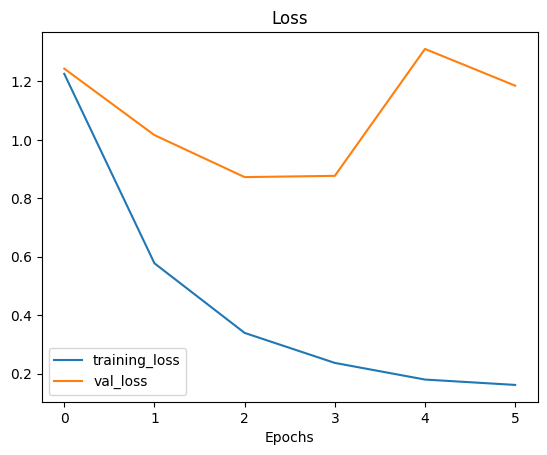

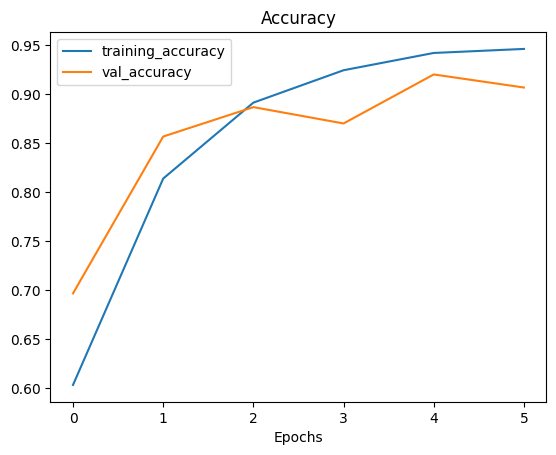

In [38]:
plot_loss_curves(history_3)

In [39]:
model_3.save('wheat_disease_VGG_finetune.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Try another model (Resnet)**

In [17]:
import tensorflow_hub as hub
from tensorflow.keras import layers


In [27]:
checkpoint_filepath_resnet = '/tmp/ckpt/checkpoint.model.keras'
model_checkpoint_callback_resnet = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath_resnet,
    monitor='val_accuracy',
    save_weights_only=True,
    save_best_only=True)

In [19]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"


In [18]:
def create_model(model_url,num_classes,img_shape=(255,255,3)):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=img_shape)
  model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(num_classes, activation='softmax', name='output_layer')
  ])
  return model


In [20]:
model_4 = create_model(resnet_url, num_classes=15)


In [21]:
model_4.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [28]:
history_4=model_4.fit(train_data, validation_data=valid_data, epochs=100, callbacks=[earlystop_callback,model_checkpoint_callback_resnet])

Epoch 1/100
410/410 [==============================] - 279s 650ms/step - loss: 1.1379 - accuracy: 0.6458 - val_loss: 1.4274 - val_accuracy: 0.6667
Epoch 2/100
410/410 [==============================] - 254s 619ms/step - loss: 0.7045 - accuracy: 0.7756 - val_loss: 1.1345 - val_accuracy: 0.7467
Epoch 3/100
410/410 [==============================] - 232s 565ms/step - loss: 0.5782 - accuracy: 0.8146 - val_loss: 1.1169 - val_accuracy: 0.7800
Epoch 4/100
410/410 [==============================] - 232s 565ms/step - loss: 0.5000 - accuracy: 0.8463 - val_loss: 1.1330 - val_accuracy: 0.7967
Epoch 5/100
410/410 [==============================] - 225s 549ms/step - loss: 0.4450 - accuracy: 0.8649 - val_loss: 1.0865 - val_accuracy: 0.8100
Epoch 6/100
410/410 [==============================] - 214s 520ms/step - loss: 0.3979 - accuracy: 0.8798 - val_loss: 1.0762 - val_accuracy: 0.8300
Epoch 7/100
410/410 [==============================] - 217s 528ms/step - loss: 0.3690 - accuracy: 0.8871 - val_loss: 0

In [29]:
model_4.evaluate(test_data)

24/24 [==============================] - 10s 429ms/step - loss: 1.2156 - accuracy: 0.8600


[1.215640902519226, 0.8600000143051147]

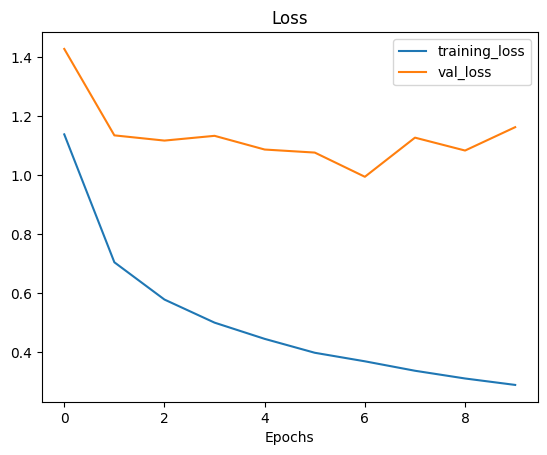

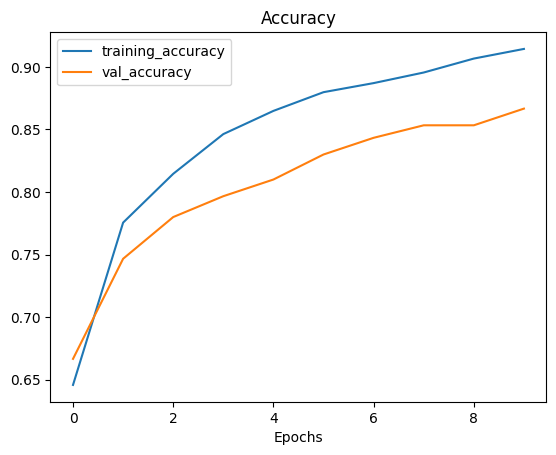

In [30]:
plot_loss_curves(history_4)

In [31]:
model_4.save('wheat_disease_restnet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
VGG_model=tf.keras.models.load_model("/content/wheat_disease_detection_vgg.h5")

In [35]:
VGG_acc=VGG_model.evaluate(test_data)[1]

24/24 [==============================] - 8s 308ms/step - loss: 0.9482 - accuracy: 0.9040


In [36]:
VGG_acc

0.9039999842643738

In [37]:
VGG_finetune_model=tf.keras.models.load_model("/content/wheat_disease_VGG_finetune.h5")

In [38]:
VGG_finetune_acc=VGG_finetune_model.evaluate(test_data)[1]

24/24 [==============================] - 8s 299ms/step - loss: 1.3004 - accuracy: 0.8867


In [39]:
VGG_finetune_acc

0.8866666555404663

In [40]:
base_model=tf.keras.models.load_model("/content/wheat disease detection model.h5")

In [41]:
base_model_acc=base_model.evaluate(test_data)[1]

24/24 [==============================] - 8s 279ms/step - loss: 0.9218 - accuracy: 0.9027


In [42]:
base_model_acc

0.9026666879653931

In [45]:
resnet_model_acc=model_4.evaluate(test_data)[1]

24/24 [==============================] - 7s 255ms/step - loss: 1.2156 - accuracy: 0.8600


In [46]:
resnet_model_acc

0.8600000143051147

In [47]:
accuracies=[base_model_acc, VGG_acc, VGG_finetune_acc, resnet_model_acc]


In [49]:
colors=['green', 'blue', 'yellow','orange']

In [50]:
labels=['base_model', 'VGG19', 'VGG_finetune', 'resnet']

In [51]:
def compare_accs(accuracy_list, label_list, color_list):
  plt.bar(label_list,accuracy_list ,color=color_list)

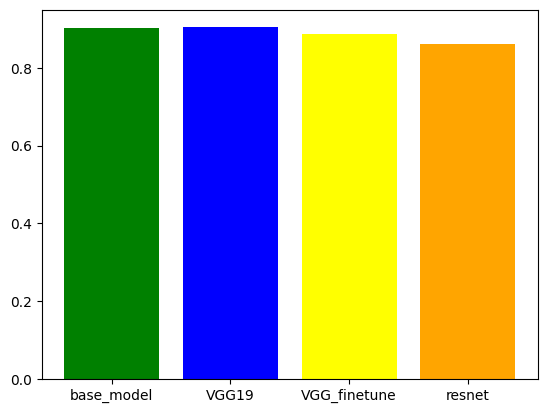

In [53]:
compare_accs(accuracy_list=accuracies,label_list=labels,color_list=colors)